# GC plot of SCT libs

Line plot of average GC% distribution of each SCT lib

In [186]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [207]:
def reservoir_sample(filename, n=10000):
    sample = []
    with open(filename) as fh:
        for i, line in enumerate(fh):
            if i < n:
                sample.append(float(line))
            else:
                j = random.randint(0, n)
                if j < n:
                    sample[j] = float(line)
    return sample

In [226]:
def seek_sample(filename, n=10000):
    sample = []
    with open(filename, 'rb') as fh:
        fh.seek(0, 2)
        filesize = fh.tell()
        
        random_set = np.sort(np.random.randint(filesize, size=n))
    
        for loc in random_set:
            fh.seek(loc)
            fh.readline()
            sample.append(float(fh.readline()))

    return np.array(sample)

In [223]:
%timeit -n1 a=reservoir_sample("Pb_DARK2_2_ATCACG_L002_R1_001.fastq")

1 loops, best of 3: 1min 45s per loop


In [222]:
%timeit -n100 b=seek_sample("Pb_DARK2_2_ATCACG_L002_R1_001.fastq")

100 loops, best of 3: 58.7 ms per loop


In [56]:
sns.set(style="darkgrid")

In [102]:
a=parse_dist("Pb_dark_2_TAGCTT_L001_R1_001.fastq")

In [228]:
d2_2=seek_sample("Pb_DARK2_2_ATCACG_L002_R1_001.fastq")
d2_3=seek_sample("Pb_DARK2_3_TTAGGC_L002_R1_001.fastq")
d2_6=seek_sample("Pb_DARK2_6_CTTGTA_L002_R1_001.fastq")
d2_7=seek_sample("Pb_DARK2_7_GATCAG_L002_R1_001.fastq")
d2_8=seek_sample("Pb_DARK2_8_TAGCTT_L002_R1_001.fastq")
d1_2=seek_sample("Pb_dark_2_TAGCTT_L001_R1_001.fastq")
d1_3=seek_sample("Pb_dark_3_GGCTAC_L001_R1_001.fastq")
d1_5=seek_sample("Pb_dark_5_CTTGTA_L001_R1_001.fastq")
l1_9=seek_sample("Pb_light_9_ATGTCA_L001_R1_001.fastq")
l1_10=seek_sample("Pb_light_10_CCGTCC_L001_R1_001.fastq")
l1_11=seek_sample("Pb_light_11_GTCCGC_L001_R1_001.fastq")

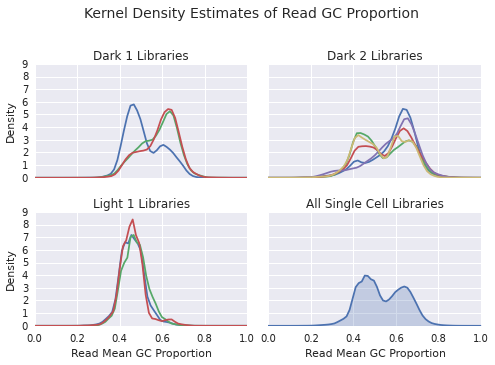

In [280]:
#d2_2=parse_dist("Pb_DARK2_2_ATCACG_L002_R1_001.fastq")
fig = plt.figure(figsize=(8,10))
plt.suptitle("Kernel Density Estimates of Read GC Proportion", size=14)
ax1 = fig.add_subplot(421)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax2 = fig.add_subplot(422)
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax4.yaxis.set_major_formatter(plt.NullFormatter())

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)


for i in [d1_2, d1_3, d1_5]:
    sns.kdeplot(i, ax=ax1, legend=True).set(xlim=(0, 1), ylim=(0, 9), ylabel="Density", title="Dark 1 Libraries")

for i in [d2_2, d2_3, d2_6, d2_7, d2_8]:
    sns.kdeplot(i, ax=ax2).set(xlim=(0, 1), ylim=(0, 9), title="Dark 2 Libraries")


for i in [l1_9, l1_10, l1_11]:
    sns.kdeplot(i, ax=ax3).set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Light 1 Libraries")
    

sns.kdeplot(np.hstack([l1_9, l1_10, l1_11, d1_2, d1_3, d1_5, d2_2, d2_3, d2_6, d2_7, d2_8]), ax=ax4, shade=True).set(ylim=(0, 9), xlim=(0, 1), xlabel="Read Mean GC Proportion", title="All Single Cell Libraries")

plt.savefig("lib_gc_prop.svg")

In [255]:
fig.savefig("lib_gc_prop.png")